# Assignment 12 - Neural Networks image recognition
Use both MLNN and the ConvNet to solve the following problem.

# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Add random noise (i.e. `np.random.normal`) to the images in training and testing. Make sure each image gets a different noise feature added to it. Inspect by printing out an image. 

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [4]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [6]:
x_train.shape

(60000, 784)

In [8]:
x_train_noise = x_train + np.random.rand(*x_train.shape)
x_test_noise = x_test + np.random.rand(*x_test.shape)

### Confirming noise was added. The new image is significantly less clear than the original.

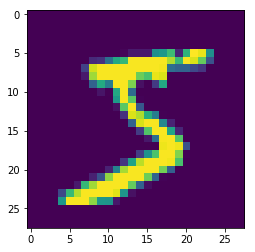

In [9]:
plt.imshow(x_train[0].reshape(28,28))

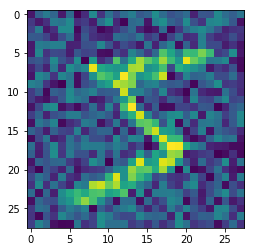

In [10]:
plt.imshow(x_train_noise[0].reshape(28,28))

## As you can see from comparing the below image of 0, and the image of 5, the variations in color are not the same, and therefore a different noise lens was added to each image.

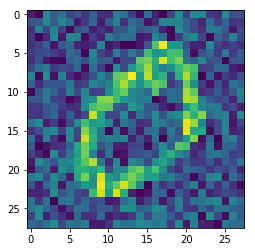

In [11]:
plt.imshow(x_train_noise[1].reshape(28,28))

In [16]:
# without noise

batch_size = 128
num_classes = 10
epochs = 10


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s - loss: 0.2468 - acc: 0.

In [14]:
scores.append({'model': 'mlnn', 'noise':'no','loss':0.10323239263, 'accuracy': 0.9802})

scores

[{'accuracy': 0.9545, 'loss': 0.173174991914, 'model': 'mlnn', 'noise': 'yes'},
 {'accuracy': 0.9802, 'loss': 0.10323239263, 'model': 'mlnn', 'noise': 'no'}]

In [17]:
# with noise

batch_size = 128
num_classes = 10
epochs = 10


# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_noise, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_noise, y_test))
score = model.evaluate(x_test_noise, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s - loss: 0.8882 - acc: 0.

In [13]:
scores = []
scores.append({'model': 'mlnn', 'noise':'yes','loss':0.173174991914, 'accuracy': 0.9545})

scores

[{'accuracy': 0.9545, 'loss': 0.173174991914, 'model': 'mlnn', 'noise': 'yes'}]

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [5]:
x_train_noise = x_train + np.random.rand(*x_train.shape)

In [6]:
x_test_noise = x_test + np.random.rand(*x_test.shape)

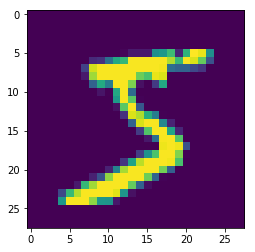

In [7]:
plt.imshow(x_train[0].reshape(28,28))

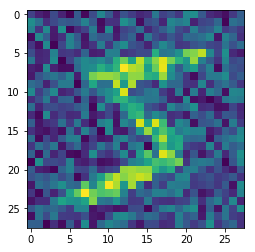

In [8]:
plt.imshow(x_train_noise[0].reshape(28,28))

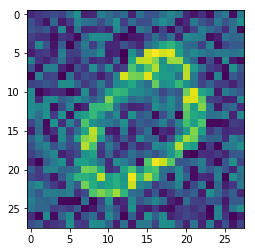

In [9]:
plt.imshow(x_train_noise[1].reshape(28,28))

#### Same as the MLNN,  the noise filter varies by image.

In [10]:
# without noise

batch_size = 128
num_classes = 10
epochs = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 245s - loss: 0.3252 - acc: 0.9014 - val_loss: 0.0780 - val_acc: 0.9746
Epoch 2/10
60000/60000 [==============================] - 245s - loss: 0.1109 - acc: 0.9678 - val_loss: 0.0523 - val_acc: 0.9826
Epoch 3/10
60000/60000 [==============================] - 268s - loss: 0.0861 - acc: 0.9744 - val_loss: 0.0418 - val_acc: 0.9866
Epoch 4/10
60000/60000 [==============================] - 267s - loss: 0.0698 - acc: 0.9794 - val_loss: 0.0384 - val_acc: 0.9867
Epoch 5/10
60000/60000 [==============================] - 256s - loss: 0.0611 - acc: 0.9822 - val_loss: 0.0347 - val_acc: 0.9872
Epoch 6/10
60000/60000 [==============================] - 257s - loss: 0.0553 - acc: 0.9837 - val_loss: 0.0331 - val_acc: 0.9882
Epoch 7/10
60000/60000 [==============================] - 252s - loss: 0.0514 - acc: 0.9851 - val_loss: 0.0329 - val_acc: 0.9887
Epoch 8/10
60000/60000 [=======================

In [15]:
scores.append({'model': 'conv', 'noise':'no','loss':0.0299754400584, 'accuracy': 0.9903})

scores

[{'accuracy': 0.9545, 'loss': 0.173174991914, 'model': 'mlnn', 'noise': 'yes'},
 {'accuracy': 0.9802, 'loss': 0.10323239263, 'model': 'mlnn', 'noise': 'no'},
 {'accuracy': 0.9903, 'loss': 0.0299754400584, 'model': 'conv', 'noise': 'no'}]

In [11]:
# with noise

batch_size = 128
num_classes = 10
epochs = 10

# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_noise, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_noise, y_test))
score = model.evaluate(x_test_noise, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 262s - loss: 0.4984 - acc: 0.8421 - val_loss: 0.1217 - val_acc: 0.9631
Epoch 2/10
60000/60000 [==============================] - 242s - loss: 0.1711 - acc: 0.9483 - val_loss: 0.0847 - val_acc: 0.9726
Epoch 3/10
60000/60000 [==============================] - 238s - loss: 0.1316 - acc: 0.9606 - val_loss: 0.0687 - val_acc: 0.9785
Epoch 4/10
60000/60000 [==============================] - 236s - loss: 0.1062 - acc: 0.9676 - val_loss: 0.0629 - val_acc: 0.9786
Epoch 5/10
60000/60000 [==============================] - 1033s - loss: 0.0942 - acc: 0.9712 - val_loss: 0.0578 - val_acc: 0.9808
Epoch 6/10
60000/60000 [==============================] - 233s - loss: 0.0851 - acc: 0.9742 - val_loss: 0.0593 - val_acc: 0.9806
Epoch 7/10
60000/60000 [==============================] - 237s - loss: 0.0767 - acc: 0.9771 - val_loss: 0.0520 - val_acc: 0.9833
Epoch 8/10
60000/60000 [======================

In [16]:
scores.append({'model': 'conv', 'noise':'yes','loss':0.0480910581976, 'accuracy': 0.9836})

scores

[{'accuracy': 0.9545, 'loss': 0.173174991914, 'model': 'mlnn', 'noise': 'yes'},
 {'accuracy': 0.9802, 'loss': 0.10323239263, 'model': 'mlnn', 'noise': 'no'},
 {'accuracy': 0.9903, 'loss': 0.0299754400584, 'model': 'conv', 'noise': 'no'},
 {'accuracy': 0.9836,
  'loss': 0.0480910581976,
  'model': 'conv',
  'noise': 'yes'}]

## 2. Compare the loss/accuracy (train, val) after N epochs for both MLNN and ConvNet with and without noise. 

In [18]:
scores = pd.DataFrame(scores)
scores

,accuracy,loss,model,noise
0,0.9545,0.173175,mlnn,yes
1,0.9802,0.103232,mlnn,no
2,0.9903,0.029975,conv,no
3,0.9836,0.048091,conv,yes


Both MLNN and Convnet performed better with less noise, as should be expected. The Convnet turned out to be more accurate the MLNN. However, the improvement was by 0.0034. Considering the amount of time and resources the ConvNet, and depending on the target being predicted, the MLNN network still performed quite well. 

## 3. Vary the amount of noise (multiply `np.random.normal` by a factor) and keep track of the accuracy and loss (for training and validation) and plot these results.

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
noises = [0.2, 0.5,0.8, 1.5, 2, 3, 5]
noise_scores = []

    
# with noise

batch_size = 128
num_classes = 10
epochs = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train_noise = x_train + np.random.rand(*x_train.shape)
x_test_noise = x_test + np.random.rand(*x_test.shape)
# convert class vectors to binary class matrices


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])



for noise in noises:   

    x_train_noise = x_train_noise = x_train + noise*np.random.rand(*x_train.shape)
    x_test_noise = x_test + noise*np.random.rand(*x_test.shape)
    
    history = model.fit(x_train_noise, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test_noise, y_test))
    score = model.evaluate(x_test_noise, y_test, verbose=0)
    print('Noise:', noise)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    noise_scores.append({'Noise': noise, 'Test loss': score[0], 'Test accuracy': score[1]})
    
#     noise_scores.append({'Noise': noise, 'Test accuracy:', score[1]})


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s - loss: 0.3424 - acc: 0.

In [7]:
noise_scores = pd.DataFrame(noise_scores)
noise_scores

,Noise,Test accuracy,Test loss
0,0.2,0.9771,0.112680
1,0.5,0.9766,0.121016
2,0.8,0.9629,0.205392
3,1.5,0.9429,0.222995
4,2.0,0.9105,0.332903
5,3.0,0.7945,0.853797
6,5.0,0.6555,1.067552


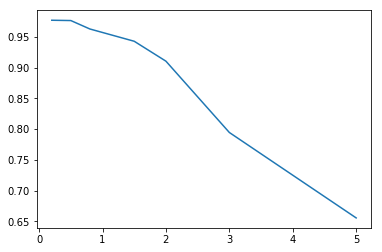

In [11]:
plt.plot(noise_scores['Noise'], noise_scores['Test accuracy'])

As can be expected, as the factor of noise increases, the test accuracy decreases. 